## Persona x Detective Naoto

I will use English translation of Japanese light novel "Persona x Detective Naoto", taken from [here](https://www.baka-tsuki.org/project/index.php?title=Persona_x_Detective_Naoto).
>Persona 4 spin-off set one year after the end of Persona 4, Naoto is asked to investigate the mysterious disappearances of two Yagakoro students by an old detective friend, Touko Aoi. There, she is partnered with Sousei Kurogami, a mechanical detective and a polar opposite to her in terms of personality and methodology. In their first encounter, she awakens to a new persona Amatsu Mikaboshi, which enables her to amplify Sousei's persona ability, Tsukuyomi. Together with Sousei, she discovers the Midnight Site, an anonymous site where judgment is passed on others by five judges named after figures in Japanese mythology—Uzume, Sarutahiko, Omoikane, Tajikarao, and Futotama.\
\
However, it quickly becomes apparent that this case and another under Touko's supervision are related when one of the five judges turns up dead with ballistics pointing to a missing police officer's gun. Naoto and the others must discover the identity of the other judges to protect them and find out the culprit who seeks to kill them.  

I downloaded all text and saved it in txt file.  
Let's start...

In [81]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.stem.snowball import SnowballStemmer
import spacy
nlp = spacy.load("en_core_web_sm")
en = nlp.Defaults.stop_words
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
%matplotlib inline
from cycler import cycler

import re
import os
from imageio import imread
from collections import Counter, defaultdict

## Data Preparation

In [82]:
text = open('Persona-x-Detective-NAOTO-ver0.9.9.txt', 'r', encoding='UTF-8').read()
text[:1000]

'\x0cTetsuma Tsuge\nAn excellent researcher of robots serving as the Yagokoro Police Special Forensics Division director. The type of casual person who doesn‘t worry about the details.\n\nTouko Aoi\nA detective employed by the Yagokoro Police. An intellectual, cool beauty like Naoto aspires to be.\n\nNaoto Shirogane\nThe sharp-witted, wise fifth generation in a lineage of detectives. With her deductive ability, she has resolved many difficult cases in the past. Nicknamed the ―Detective\nPrince‖.\n\nSousei Kurogami\nA male ―mechanical weapon‖ developed in the past by the Kirijo Group. He has an impulsive and straightforward personality and is overly arrogant.\n\x0cShadow\nThe ―other self‖ that dwells in the hearts of every human, from which we normally avert our eyes. An existence that gets its name from the ―shadow‖ formed from suppressed\ndesires and wishes, the other side of the same coin as a Persona.\n\nPersona\nThe ―other self‖ sleeping in our hearts given form and called forth. O

\
There are some sentences separated by "\n\n" or "\n", special unicode characters (\x0c) and useles symbols (‖,―)

In [83]:
text = [i for i in text.split('\n')]
text = [i.replace('\x0c', '').replace('‖', '') for i in text]
text = [i.replace('―','').replace('-',' ') for i in text]
text = ' '.join(text)

In [84]:
#One cleaned text.
text[:500]

'Tetsuma Tsuge An excellent researcher of robots serving as the Yagokoro Police Special Forensics Division director. The type of casual person who doesn‘t worry about the details.  Touko Aoi A detective employed by the Yagokoro Police. An intellectual, cool beauty like Naoto aspires to be.  Naoto Shirogane The sharp witted, wise fifth generation in a lineage of detectives. With her deductive ability, she has resolved many difficult cases in the past. Nicknamed the Detective Prince.  Sousei Kuroga'

\
Next step we will tokenize the text

In [85]:
#Parse text with spacy
nlp_text = nlp(text)
#For nltk
tokenizer = RegexpTokenizer(r'\w+')
tok_text = tokenizer.tokenize(text)

## Character occurence in text

Extracting information from text is wery useful in many ways, like finding main entities, finding important information in a corpus or deducing author's writing style.  
\
This time I will try to found main characters in the text and how often they are remembered.
\
I will try these metods:
- First I will use spacy and try to find entities, who are considered to be persons;
- Then I find proper nouns, with spacy;
- Next attempt will be with nltk - finding various nouns;
- And I simply find the most common words in the list of tokens.

In [86]:
def character_occurences(condition):
    if condition == 1:
        characters = Counter()
        for ent in nlp_text.ents:
            if ent.label_ == 'PERSON':
                characters[ent.lemma_] += 1
        return characters.most_common()
    
    if condition == 2:
        characters1 = Counter()
        for token in nlp_text:
            if token.pos_ == 'PROPN':
                characters1[token.lemma_] += 1
        return characters1.most_common()
    
    if condition == 3:
        tagged_tokens = nltk.pos_tag(filtered_text)
        characters2 = Counter()
        for token in tagged_tokens:
            if token[1] in ['NN', 'NNP', 'NNS']:
                characters2[token[0].lower()] += 1
        return characters2.most_common()
    
    else:
        counts = Counter(filtered_text)
        return counts.most_common()      

In [87]:
# let's remowe stop words first
tok_text = [w.lower() for w in tok_text]
stpwrd = stopwords.words('english')
stpwrd.extend(['san'])
stemmer = SnowballStemmer("english")
tok_text = [stemmer.stem(token) for token in tok_text]
filtered_text = [word for word in tok_text if word not in stpwrd]

In [88]:
print('Spacy 1 ',character_occurences(1)[:20])
print('\n','Spacy 2 ',character_occurences(2)[:20])
print('\n','NLTK ',character_occurences(3)[:20])
print('\n','Counts ',character_occurences(4)[:20])

Spacy 1  [('Sousei', 557), ('Kyouhei Hioka', 76), ('Persona', 73), ('Konno', 65), ('Alex Brown', 65), ('Kagu', 44), ('Miyuki Midorikawa', 36), ('Touko', 31), ('Kyouhei', 27), ('Tajikarao', 27), ('Sousei Kurogami', 26), ('Futodama', 23), ('Konno‘s', 18), ('Omoikane', 16), ('Osamu Haida', 16), ('Alex Brown‘s', 15), ('Iwato Apartments', 14), ('Takizawa', 12), ('Amatsu Mikaboshi', 10), ('sousei', 10)]

 Spacy 2  [('Touko', 719), ('Sousei', 596), ('Kyouhei', 310), ('Hioka', 242), ('I‘m', 182), ('Tsuge', 178), ('Naoto', 155), ('san', 116), ('Yagokoro', 99), ('Shirou', 94), ('Persona', 87), ('Alex', 81), ('Konno', 77), ('Miyuki', 68), ('Brown', 68), ('Hioka‘s', 67), ('Togakushi', 67), ('Omoikane', 62), ('You‘re', 59), ('Judges', 59)]

 NLTK  [('touko', 545), ('sousei', 415), ('time', 251), ('hioka', 232), ('kyouhei', 203), ('person', 174), ('case', 169), ('word', 160), ('way', 156), ('look', 149), ('tsuge', 136), ('eye', 135), ('naoto', 134), ('school', 119), ('peopl', 113), ('moment', 108), 

\
First and second attempt have the best performanse. NLTK is somewhere in between - more captured occurences and more wrong words.\
\
Now I'll use the second attempt to visualize the frequency of characters' mentions.

In [89]:
def offsets(text):
    offsets = defaultdict(list)
    for ent in text.ents:
        if ent.label_ == 'PERSON':
            offsets[ent.lemma_].append(ent.start)
            
    return dict(offsets)

occurences = offsets(nlp_text)

def plot_character(labels):
    x = [occurences[label] for label in labels] 
    plt.figure(figsize=(16,12))
    bins_n = 20
    n, bins, patches = plt.hist(x, bins_n, label=labels)
    plt.clf()
    ax = plt.subplot(111)
    for i, a in enumerate(n):
        ax.plot([float(x) / (bins_n - 1) for x in range(len(a))], a, label=labels[i])

    matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['r', 'b', 'y', 'black', 'cyan', 'green', 'lightgray'])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xticklabels(labels)
    tick_spacing = 0.05
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

<ipython-input-89-7a70a42de7fe>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


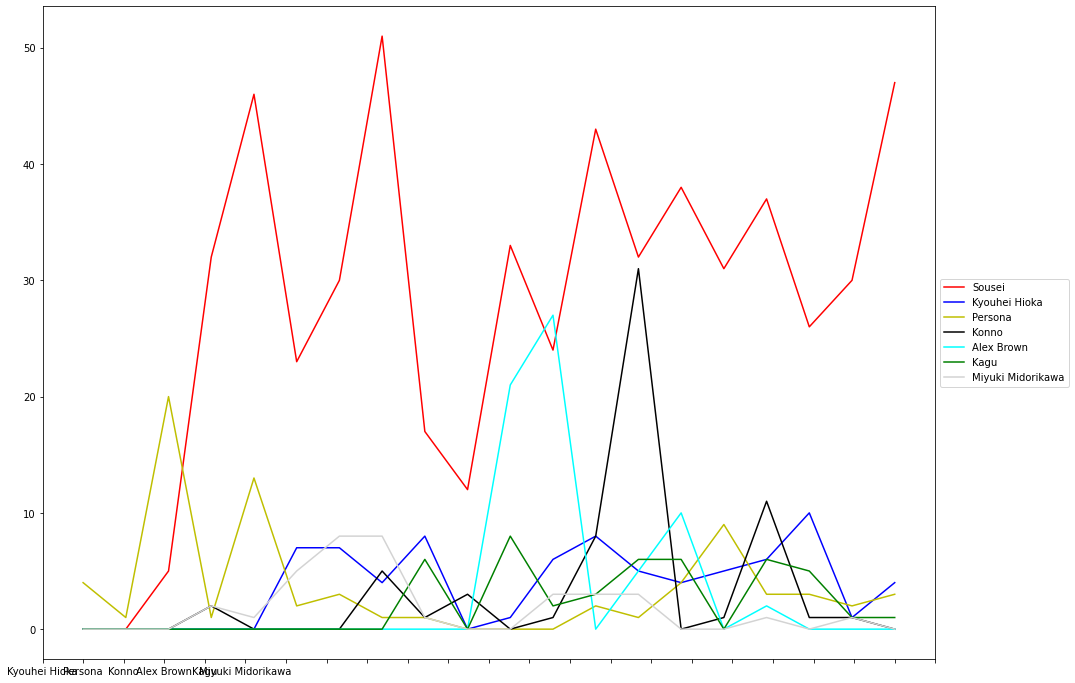

In [90]:
plot_character(['Sousei', 'Kyouhei Hioka', 'Persona', 'Konno', 'Alex Brown', 'Kagu', 'Miyuki Midorikawa'])

## Part of speach using

Using POS it's possible to parse text and find relationships between words. We will find adjectives, describing certain character.

In [91]:
def get_adjectives(doc, character_lemma):
    adjectives = []
    for ent in nlp_text.ents:
        if ent.lemma_ == character_lemma:
            for token in ent.subtree:
                if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in nlp_text.ents:
        if ent.lemma_ == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

In [92]:
print(get_adjectives(nlp_text, 'Kyouhei Hioka'))

['old', 'illusory', 'pendant', 'missing', 'excellent', 'suspicious', 'excellent', 'dead', 'dead', 'dead', 'alive', 'alive', 'dead', 'dead', 'dead', 'dead', 'able', 'alive', 'strong', 'lucky', 'skilled', 'familiar']


\
Looks like he way more dead then alive.  
`I had little reserch in the internet and yes, he was 'killed by Shirou Konno'`  

We can also find most used words belonging to separate parts of speach.

In [93]:
tag_list = ['PROPN', 'ADJ', 'ADP', 'PRON', 'ADV', 'NOUN', 'VERB']
for i in tag_list:
    words = [token.lemma_ for token in nlp_text if token.pos_ == i and token.lemma_ not in en]
    words_count = Counter(words)
    print(i, words_count.most_common(10))

PROPN [('Touko', 719), ('Sousei', 596), ('Kyouhei', 310), ('Hioka', 242), ('I‘m', 182), ('Tsuge', 178), ('Naoto', 155), ('san', 116), ('Yagokoro', 99), ('Shirou', 94)]
ADJ [('right', 120), ('able', 95), ('good', 91), ('little', 65), ('bad', 54), ('large', 52), ('true', 49), ('great', 45), ('impossible', 41), ('high', 39)]
ADP [('like', 351), ('i‘m', 16), ('inside', 15), ('past', 13), ('san‘s', 9), ('away', 7), ('outside', 5), ('atop', 5), ('w', 4), ('unlike', 4)]
PRON [('I', 3485), ('i‘ll', 54), ('ya', 4), ('you‘d', 4), ('you‘ve', 4), ('they‘d', 4), ('it‘ll', 3), ('who‘s', 3), ('i‘d', 3), ('hasn‘t', 2)]
ADV [('right', 97), ('immediately', 72), ('far', 50), ('ago', 50), ('away', 49), ('completely', 46), ('long', 46), ('san‘s', 43), ('soon', 42), ('matter', 41)]
NOUN [('san', 909), ('time', 245), ('it‘s', 194), ('case', 168), ('word', 158), ('way', 155), ('police', 153), ('san‘s', 143), ('person', 138), ('eye', 135)]
VERB [('know', 339), ('think', 294), ('look', 180), ('come', 159), ('wa

## Common collocations

One of the ways to undestend the text is looking for collocatins. I divide the text into phrases of two or more words to see which of the most common ones are unique to this text.

In [94]:
n_grams = ngrams(filtered_text,2)
Counter(n_grams).most_common(20)

[(('kyouhei', 'hioka'), 261),
 (('shirou', 'konno'), 92),
 (('alex', 'brown'), 83),
 (('miyuki', 'midorikawa'), 69),
 (('five', 'togakushi'), 64),
 (('togakushi', 'judg'), 64),
 (('midnight', 'site'), 61),
 (('kagu', 'tsuchi'), 58),
 (('past', 'convers'), 47),
 (('kaoru', 'hioka'), 44),
 (('high', 'school'), 41),
 (('touko', 'aoi'), 37),
 (('yagokoro', 'polic'), 36),
 (('next', 'moment'), 35),
 (('even', 'though'), 35),
 (('yagokoro', 'high'), 34),
 (('sousei', 'kurogami'), 33),
 (('naoto', 'shirogan'), 32),
 (('year', 'ago'), 32),
 (('shook', 'head'), 31)]

\
Bi-grams mostly have character names

In [95]:
n_grams = ngrams(filtered_text,3)
Counter(n_grams).most_common(20)

[(('five', 'togakushi', 'judg'), 64),
 (('yagokoro', 'high', 'school'), 34),
 (('member', 'five', 'togakushi'), 26),
 (('special', 'forens', 'divis'), 24),
 (('yagokoro', 'polic', 'station'), 14),
 (('student', 'council', 'presid'), 13),
 (('six', 'year', 'ago'), 10),
 (('ten', 'minut', 'futur'), 9),
 (('high', 'school', 'student'), 9),
 (('crime', 'scene', 'investig'), 8),
 (('kyouhei', 'hioka', 'disappear'), 8),
 (('kill', 'alex', 'brown'), 8),
 (('school', 'student', 'disappear'), 7),
 (('student', 'disappear', 'case'), 7),
 (('half', 'year', 'ago'), 7),
 (('detect', 'past', 'convers'), 7),
 (('miyuki', 'midorikawa', 'past'), 7),
 (('midorikawa', 'past', 'convers'), 7),
 (('hioka', 'disappear', 'case'), 7),
 (('think', 'kyouhei', 'hioka'), 7)]

\
Tri-grams looks way more interesting, Kyouhei Hioka is not only dead, he is disappear, he is a student. often mentioned 'yagokoro', 'high', 'school' means he was a student of this school.\
It seems that the plot of the book revolves around the disappearance of a student from school and the investigation of this crime!

## Wordcloud

Wordclouds provide a great way of showing topics or most important words in the text

In [96]:
text = ' '.join(filtered_text)

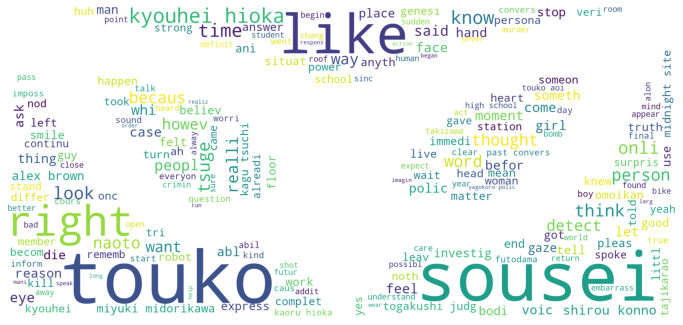

In [97]:
#The source of the icon: https://www.pngegg.com/en/png-ypidv
mask_ = imread('persona.png')
wordcloud = WordCloud(max_font_size=None, mask=mask_, stopwords=en, background_color='white',
                      width=1200, height=1000).generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()